## Dependencies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv('data/mall_customers_marketing_groups.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Marketing group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,2
197,198,Male,32,126,74,4
198,199,Male,32,137,18,2


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Marketing group'],
      dtype='object')

## Turning Gender into a numeric column

In [4]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
df["isMale"] = (df["Gender"] == "Male").astype(int)

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Marketing group,isMale
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,4,0
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,4,1
198,199,Male,32,137,18,2,1


## Split the data

In [7]:
X = df[['CustomerID', 'isMale', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

y = df[["Marketing group"]]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Model training & visualization

#### 1: Decison Tree Calssifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

Decision Tree Accuracy: 0.9


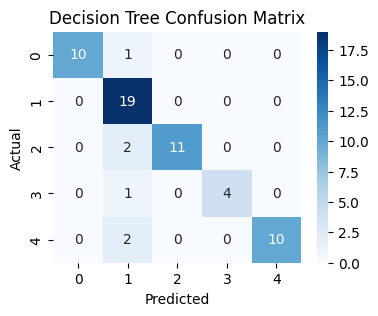

In [10]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
dtree_preds = dtree.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_preds)
dtree_cm = confusion_matrix(y_test, dtree_preds)

print("Decision Tree Accuracy:", dtree_acc)

plt.figure(figsize=(4, 3))
sns.heatmap(dtree_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2: SVM

SVM Accuracy: 0.9333333333333333


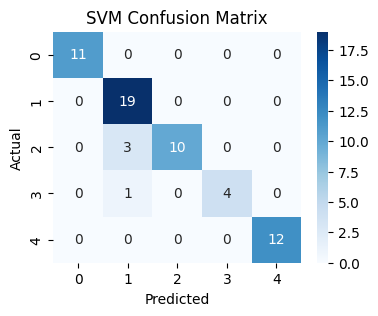

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train.values.ravel())
svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

print("SVM Accuracy:", svm_acc)

plt.figure(figsize=(4, 3))
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 3: KNN

KNN Accuracy: 0.95


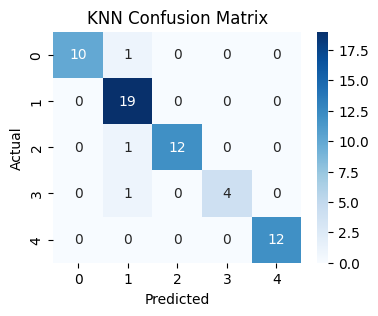

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train.values.ravel())
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
knn_cm = confusion_matrix(y_test, knn_preds)

print("KNN Accuracy:", knn_acc)

plt.figure(figsize=(4, 3))
sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt="d")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 4: Naive Bayes Classifier

Naive Bayes Accuracy: 1.0


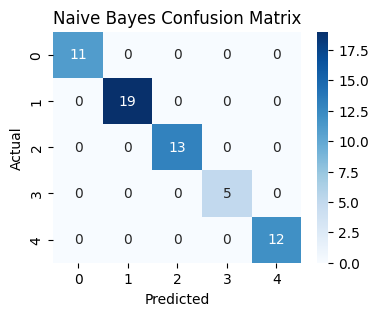

In [13]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train.values.ravel())
nb_preds = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_preds)
nb_cm = confusion_matrix(y_test, nb_preds)

print("Naive Bayes Accuracy:", nb_acc)

plt.figure(figsize=(4, 3))
sns.heatmap(nb_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()